$\#\#\#\#\#\#\#$ Libraries $\#\#\#\#\#\#\#$

In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE


import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

# Data

The data set train.csv contains 455 patiens which had been or not had been diagnosed by breast cancer. Each column of the dataset indicates the physical caracteristics of a possible breast tumor like its radius, the texture, or, the perimeter.

In [20]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,11.69,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
1,0,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
2,0,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,...,13.01,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097
3,1,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
4,1,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,...,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130


In [22]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [23]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.373626,14.139000,19.306286,92.086044,657.829890,0.096849,0.105557,0.090775,0.049585,0.181319,...,16.276679,25.823099,107.319516,882.553187,0.133482,0.256997,0.278242,0.115695,0.290325,0.084309
std,0.484299,3.625935,4.267421,24.998077,363.536865,0.013981,0.052932,0.080993,0.039159,0.027140,...,4.897917,6.123728,34.025815,574.721873,0.022902,0.157587,0.211802,0.065949,0.059696,0.018168
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.705000,16.210000,75.015000,419.250000,0.086740,0.066735,0.030180,0.020720,0.162050,...,12.980000,21.350000,84.290000,513.950000,0.118350,0.151650,0.119350,0.065080,0.251550,0.071835
50%,0.000000,13.300000,18.890000,85.980000,546.400000,0.096860,0.094860,0.063870,0.033840,0.179700,...,14.990000,25.440000,97.660000,688.600000,0.132600,0.215600,0.229900,0.099930,0.283300,0.080190
75%,1.000000,15.740000,21.795000,103.650000,777.250000,0.106050,0.130450,0.132200,0.074490,0.195800,...,18.550000,29.990000,124.950000,1047.000000,0.147950,0.333800,0.387200,0.161950,0.317500,0.092070
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.577400,0.207500


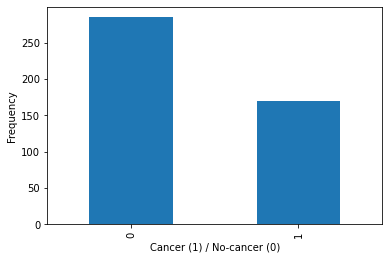

In [24]:
df['diagnosis'].value_counts().plot.bar()
plt.xlabel('Cancer (1) / No-cancer (0)')
plt.ylabel('Frequency')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

### Qualititive description of the dataset

The columns (features) in the dataset, mainly, are:

* radius: mean of distances from center to points on the perimeter. 
* texture: comes given by the standard deviation of the colors in the grey-scale of the scan.
* perimeter: boundary of two dimensional figure
* area: area of two dimensional figure
* smoothness: local variation of the colors in radius lenght
* compactness: variation of the perimeter squared with the area: $$\frac{perimeter^2}{area} - 1$$
* concavity: severity of concave portions of the contour
* concave points: number of concave portions of the contour
* symmetry: evaluation of the symmetry of the two dimensional figure
* fractal_dimension: area contained by the boundary of the figure. See in ref [1] figure [1]. The authors, see ref [3], of the dataset had set this value as: $\mbox{coastline approximation} - 1$.

Each of these columns is split on their mean, standard error, and, worst (it is the mean value of the three largest measures).

By taking into account the input from nunique() we can see that the dataset is comprised by one categorical feature: diagnosis and the others are numerical non-classificator values. Also, from the graph above, we can see that the set is slightly unbalanced over the non-cancerigenous tumor diagonsis, we will need to explore if balancing the set will provide more accurate results when training the algorithm.

[1] https://medical-dictionary.thefreedictionary.com/perimeter

[2] https://encyclopedia.thefreedictionary.com/Fractal+dimension

[3] https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 
(If the dataset is not Handmade by the webmasters/authors reference of the paper(s) should be given.)

All 455 entries contain non-null characters.

In [26]:
df.nunique()

diagnosis                    2
radius_mean                382
texture_mean               392
perimeter_mean             423
area_mean                  433
smoothness_mean            383
compactness_mean           431
concavity_mean             440
concave points_mean        440
symmetry_mean              362
fractal_dimension_mean     412
radius_se                  437
texture_se                 422
perimeter_se               433
area_se                    428
smoothness_se              441
compactness_se             438
concavity_se               431
concave points_se          411
symmetry_se                406
fractal_dimension_se       440
radius_worst               384
texture_worst              424
perimeter_worst            418
area_worst                 442
smoothness_worst           349
compactness_worst          424
concavity_worst            435
concave points_worst       404
symmetry_worst             408
fractal_dimension_worst    430
dtype: int64

To determine which features are relevant on our dataset we will compute the cross correlation.

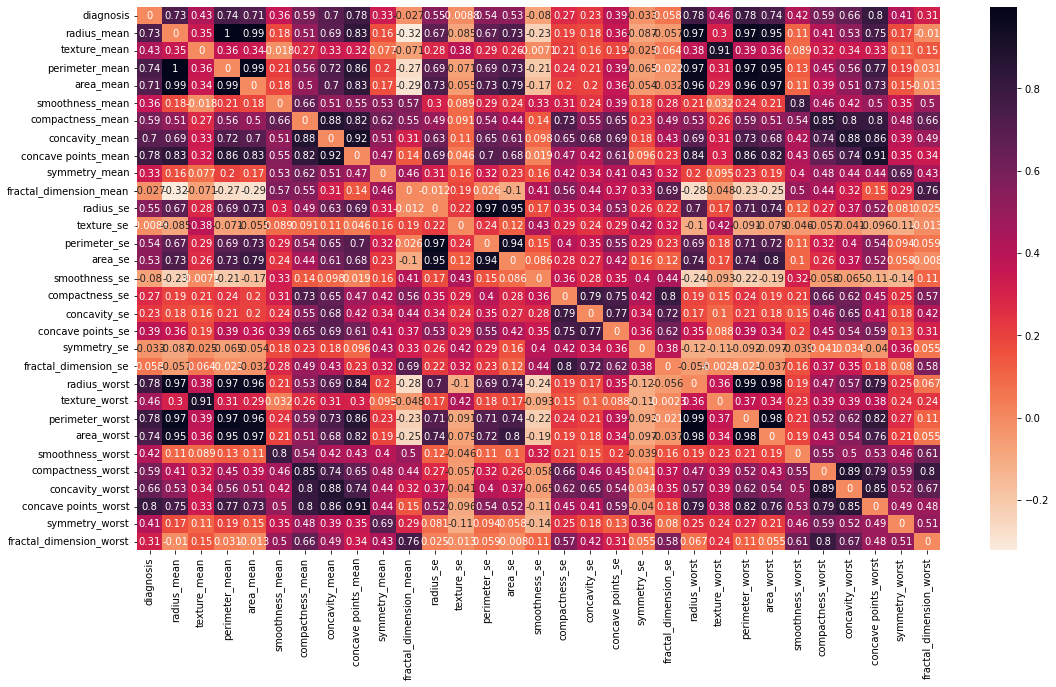

In [27]:
corrdf = df.corr()
corrdf = corrdf - np.identity(df.shape[1]) # we are not interested in self-interactions! Also avoids self-links
f, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrdf, xticklabels=True, yticklabels=True, annot=True, cmap=sns.cm.rocket_r, ax=ax)
plt.show()

We can see in the figure above that there are certain values that are very weak, as fractal_dimension-diagonsis and might not be relevant to the analysis and training of the algorithms. Thus we will reduce our correlation matrix, only taking into account the stronger correlation. To do so we will use the standard deviation as threshold for each feature, instead of global, it will give us a little more of accuracy and then we will represent into a network to see how sparse it is and if there might be some hubs or our network is split in more than one.

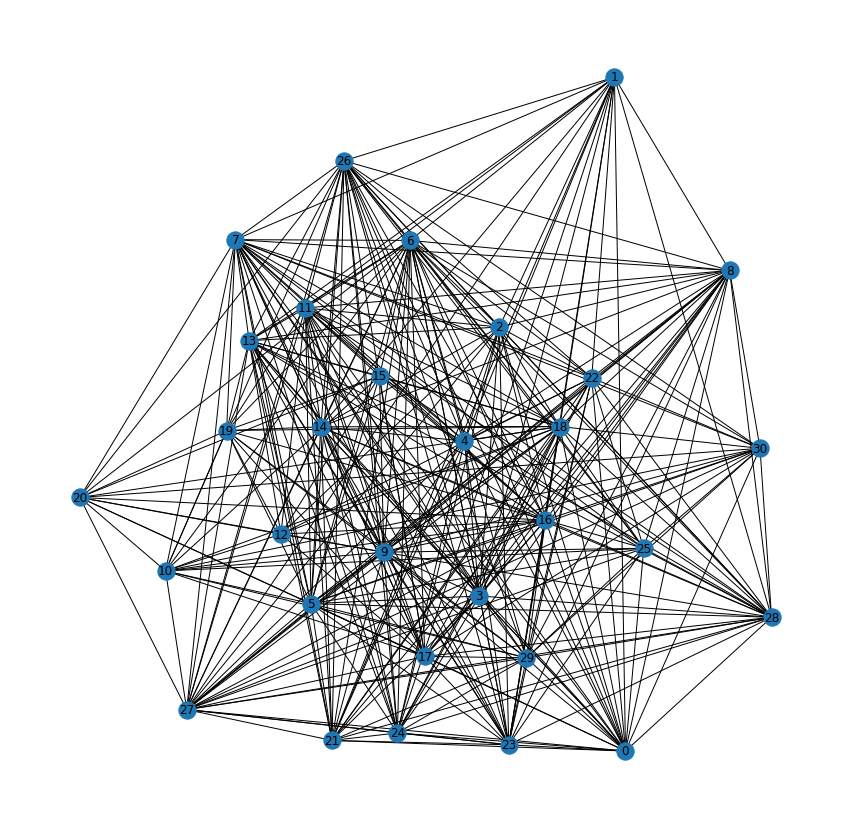

In [28]:
import networkx as nx
# 1. adjacency matrix is the correlations is abs value:
corrdfas = abs(corrdf)

# 2. Use a threshold to only keep the strongest links:
thres = corrdfas.std()
net = corrdf[(corrdf >= thres)]
net[np.isnan(net)] = 0
net2 = np.array(net)

# 3. Map the network
G = nx.from_numpy_matrix(net2)

f, ax = plt.subplots(figsize = (15,15))
pos = nx.kamada_kawai_layout(G) #"bipartite_layout","circular_layout","kamada_kawai_layout","random_layout",
#"rescale_layout","rescale_layout_dict","shell_layout", "spring_layout", "spectral_layout","planar_layout",
#"fruchterman_reingold_layout","spiral_layout","multipartite_layout",


nodes = nx.draw_networkx_labels(G, pos)

nx.draw(G, pos)
plt.show()

The network represented above it is practically full network (misses very few connections), and it is very difficult to find the conections of **node** 0 (or Diagnose feature) by using this representation with any of the layouts, next we will use the heatmap to determine which columns are more relevant when there is a diagnose.  

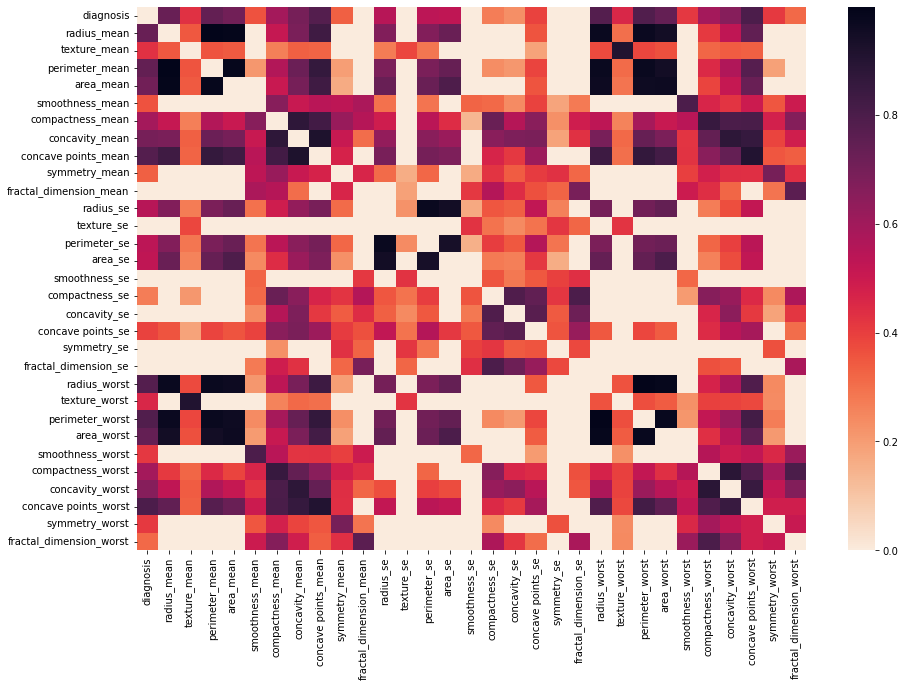

In [29]:
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(net, xticklabels=True, yticklabels=True, cmap=sns.cm.rocket_r,ax=ax)
plt.show()

In the plot above we can see that there are some highly correlated values like radius, texture, perimeter, and, area (all three: mean, se, and, worst), which might be hubs. Also, the features less significatives seem to be smoothness, symmetry, and, fractal_dimension, and with standard error there is also concavity and compactness.

Since we are only interested in the diagnosis feature, it is why we will zoom in this column to determine which are the features that are not determinant to determine if a tumor it is or not cancerigenous.

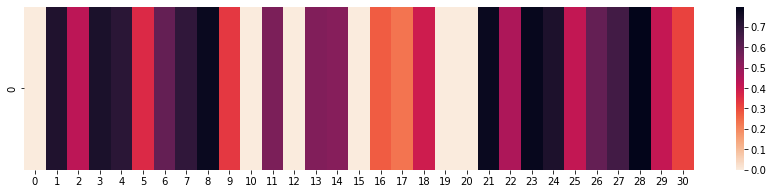

In [30]:
vec = np.asarray(net.iloc[0])
vec
f, ax = plt.subplots(figsize = (15,3))
sns.heatmap([vec], xticklabels=True, yticklabels=True, cmap=sns.cm.rocket_r)
plt.show()

In the figure above we can see that the values on columns: 0 (this is the diagnose classification column, thus is not relevant), 10, 12, 15, 19, and, 20 are not relevant for the diagnose. It is more the ones more relevant for the diagonse are the columns 1, 3, 4, 8, 21, 23, 24, and, 28.

The list of columns that they are weakly correlated, and thus are not relevant for the diagnose, is below: 

In [31]:
list0 = net.iloc[0][net.iloc[0] == 0].index
list0

Index(['diagnosis', 'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Our cleaned dataset is:

In [32]:
df2 = df.drop(list0, axis=1)
df2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.710,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.3198,...,11.690,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
1,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.1872,...,14.670,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
2,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,0.2451,...,13.010,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097
3,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.4390,...,20.270,36.71,149.30,1269.0,0.1641,0.6110,0.6335,0.20240,0.4027,0.09876
4,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.2092,...,18.330,30.12,117.90,1044.0,0.1552,0.4056,0.4967,0.18380,0.4753,0.10130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.1938,...,16.230,29.89,105.50,740.7,0.1503,0.3904,0.3728,0.16070,0.3693,0.09618
451,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.4309,...,16.110,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779
452,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.4226,...,17.870,30.70,115.70,985.5,0.1368,0.4290,0.3587,0.18340,0.3698,0.10940
453,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.1844,...,10.750,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.08120,0.2982,0.09825


# Algorithm training:

For training the algorithm, we will use the data in three different stages: raw, standarized (since all values are numerical non-categorical) and, finally, we will balance our dataset. Also we will use three distinct classifiers to determine which one gives the training set more accurate results be the one that we will use for the prediction. 

But first we will define our train/test sets from the train.csv for training the algorithm.

In [33]:
# Define our X and y.
X = np.array(df2) # since we already extracted the column with diagnose we use it as it is.
y = np.array(df['diagnosis']).reshape(-1,1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=42, 
                                                    shuffle=True, stratify=y)

In [35]:
y_test.shape

(137,)

### a) Raw data

R^2 for train:  1.0
R^2 for test:  0.927007299270073
Accuracy:  0.927007299270073
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        86
           1       0.89      0.92      0.90        51

    accuracy                           0.93       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.93      0.93      0.93       137



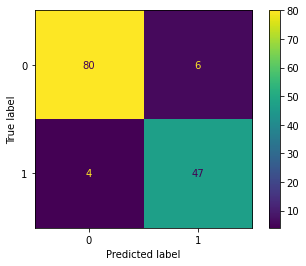

In [36]:
# Decision Tree Classifier
mDT = DecisionTreeClassifier(random_state=42)
mDT.fit(X_train, y_train)

print('R^2 for train: ', mDT.score(X_train, y_train))
print('R^2 for test: ', mDT.score(X_test, y_test))

# prediction:
ypDT = mDT.predict(X_test)

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypDT))
print(metrics.classification_report(y_test, ypDT))
metrics.plot_confusion_matrix(mDT, X_test, y_test)
plt.show()

R^2 for train:  0.9685534591194969
R^2 for test:  0.9124087591240876
Accuracy:  0.9124087591240876
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        86
           1       0.93      0.82      0.87        51

    accuracy                           0.91       137
   macro avg       0.92      0.89      0.90       137
weighted avg       0.91      0.91      0.91       137



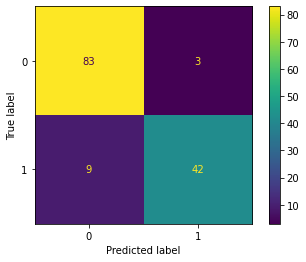

In [37]:
# KNearest Neighbors
mKNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
mKNN.fit(X_train,y_train)

# prediction:
ypKNN = mKNN.predict(X_test)

print('R^2 for train: ', mKNN.score(X_train, y_train))
print('R^2 for test: ', mKNN.score(X_test, y_test))

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypKNN))
print(metrics.classification_report(y_test, ypKNN))
metrics.plot_confusion_matrix(mKNN, X_test, y_test)
plt.show()

R^2 for train:  0.9716981132075472
R^2 for test:  0.9416058394160584
Accuracy:  0.9416058394160584
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        86
           1       0.94      0.90      0.92        51

    accuracy                           0.94       137
   macro avg       0.94      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



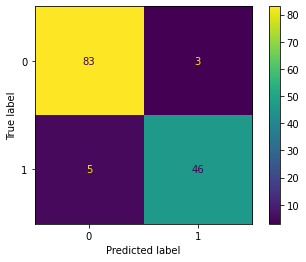

In [38]:
# Suport Vector Machine
#import time
#time0 = time.time()
mSVC = svm.SVC(kernel='linear',random_state=42)
mSVC.fit(X_train,y_train)
#time1 = time.time()

# prediction:
ypSVC = mSVC.predict(X_test)

print('R^2 for train: ', mSVC.score(X_train, y_train))
print('R^2 for test: ', mSVC.score(X_test, y_test))

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSVC))
print(metrics.classification_report(y_test, ypSVC))
metrics.plot_confusion_matrix(mSVC, X_test, y_test)
plt.show()

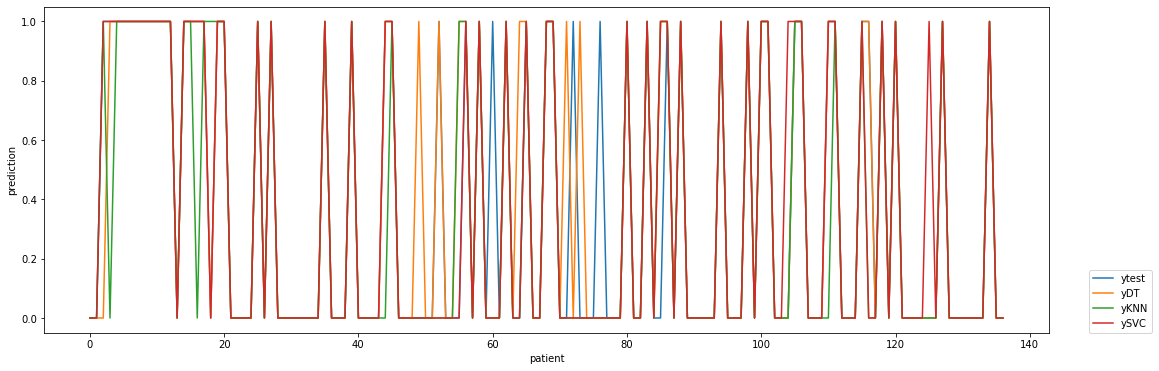

In [39]:
f, ax = plt.subplots(figsize = (18,6))
xc = np.array(list(range(0,X_test.shape[0])))
line0 = plt.plot(xc, y_test)
line1 = plt.plot(xc, ypDT)
line2 = plt.plot(xc, ypKNN)
line3 = plt.plot(xc, ypSVC)
plt.xlabel('patient')
plt.ylabel('prediction')
plt.legend(['ytest', 'yDT', 'yKNN', 'ySVC'],loc=(1.04,0))
plt.show()

In the figure above we can see the red line (prediction of SVM) and orange (prediction Decision Tree) are the ones that follows more closley the blue line (test true results). 

Table Summary of well-behaviour of the three methods used for the training:


$$\begin{array}{| c | c | c c c c || c | c | c | c | c |}
 &  \mbox{Accuracy} & \mbox{TP}(\%) & \mbox{FP} (\%) & \mbox{FN} (\%) & \mbox{TN} (\%)  & \mbox{Class}  & \mbox{Precision} & \mbox{Recall} & \mbox{F1-score} \\
\hline
\mbox{Decision Tree}  & 0.913 & 58.39 & 4.38 & 2.92 & 34.31 & 0 & 0.95 & 0.93 & 0.94 \\
 & &  &  &  &  & 1 & 0.89 & 0.92 & 0.90 \\ 
\hline
\mbox{KNeighbours}  & 0.913 & 60.58 & 2.19 & 6.57 & 30.66 & 0 & 0.90 & 0.97 & 0.93 \\
 & &  &  &  &  & 1 & 0.93 & 0.82 & 0.87 \\
\hline
\mbox{SVC}  & 0.942 & 60.58 & 2.19 & 3.65 & 33.58 & 0 & 0.94 & 0.97 & 0.95 \\
 & &  &  &  &  & 1 & 0.94 & 0.90 & 0.92 \\
\hline
\end{array}$$

All three methods give high Accuracy, around $0.9$. Although, the most accurate results are given by Support Vector Machine. All their values are higher, and also they have the more equilibrate and less percentage of False/True negatives, which we are interested because we need robustness in the diagnose.


### b) Standarized

To standarize the dataset we will use RobustScaler function, we need to use this before spliting on train/test sets for training the algorithm.

In [40]:
# use robustscaler in X
scaler2 = RobustScaler()
X_scaled = scaler2.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.ravel(), test_size=0.3, random_state=42, 
                                                    shuffle=True, stratify=y)

===Decision Tree===
R^2 for train:  1.0
R^2 for test:  0.927007299270073
Accuracy:  0.927007299270073
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        86
           1       0.89      0.92      0.90        51

    accuracy                           0.93       137
   macro avg       0.92      0.93      0.92       137
weighted avg       0.93      0.93      0.93       137



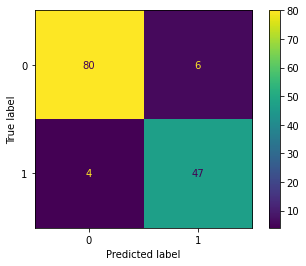

===KNearest Neighbours===
R^2 for train:  0.9716981132075472
R^2 for test:  0.9635036496350365
Accuracy:  0.9635036496350365
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        86
           1       0.98      0.92      0.95        51

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137



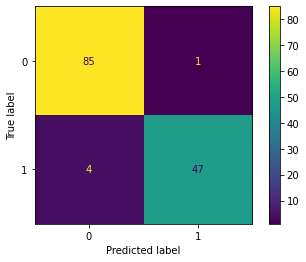

===SVMachine===
R^2 for train:  0.9874213836477987
R^2 for test:  0.9708029197080292
Accuracy:  0.9708029197080292
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        86
           1       1.00      0.92      0.96        51

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



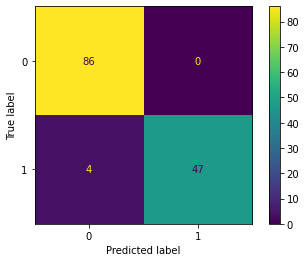

In [42]:
# Decision Tree Classifier
mSDT = DecisionTreeClassifier(random_state=42)
mSDT.fit(X_train, y_train)
print('===Decision Tree===')
print('R^2 for train: ', mSDT.score(X_train, y_train))
print('R^2 for test: ', mSDT.score(X_test, y_test))

# prediction:
ypSDT = mSDT.predict(X_test)

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSDT))
print(metrics.classification_report(y_test, ypSDT))
metrics.plot_confusion_matrix(mSDT, X_test, y_test)
plt.show()
# KNearest Neighbors
mSKNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
mSKNN.fit(X_train,y_train)

# prediction:
ypSKNN = mSKNN.predict(X_test)

print('===KNearest Neighbours===')
print('R^2 for train: ', mSKNN.score(X_train, y_train))
print('R^2 for test: ', mSKNN.score(X_test, y_test))

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSKNN))
print(metrics.classification_report(y_test, ypSKNN))
metrics.plot_confusion_matrix(mSKNN, X_test, y_test)
plt.show()

# Suport Vector Machine
#import time
#time0 = time.time()
mSSVC = svm.SVC(kernel='linear',random_state=42)
mSSVC.fit(X_train,y_train)
#time1 = time.time()

# prediction:
ypSSVC = mSSVC.predict(X_test)

print('===SVMachine===')
print('R^2 for train: ', mSSVC.score(X_train, y_train))
print('R^2 for test: ', mSSVC.score(X_test, y_test))

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSSVC))
print(metrics.classification_report(y_test, ypSSVC))
metrics.plot_confusion_matrix(mSSVC, X_test, y_test)
plt.show()

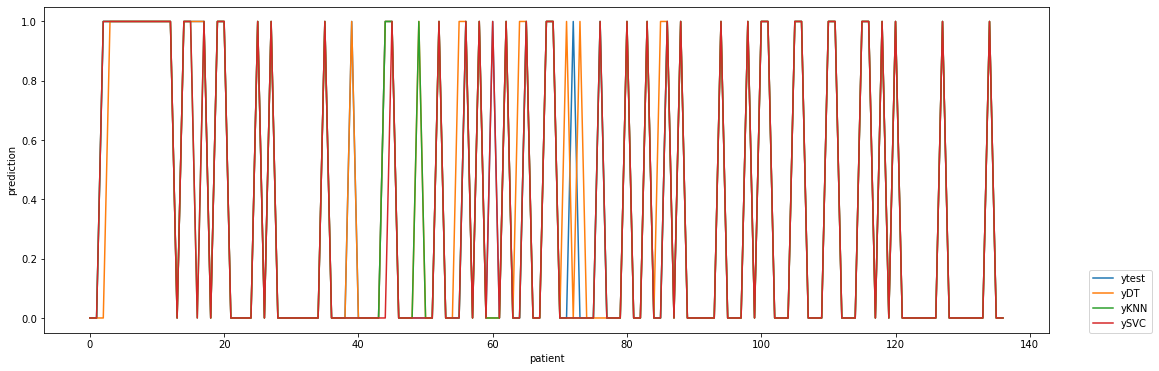

In [43]:
f, ax = plt.subplots(figsize = (18,6))
xc = np.array(list(range(0,X_test.shape[0])))
line0 = plt.plot(xc, y_test)
line1 = plt.plot(xc, ypSDT)
line2 = plt.plot(xc, ypSKNN)
line3 = plt.plot(xc, ypSSVC)
plt.xlabel('patient')
plt.ylabel('prediction')
plt.legend(['ytest', 'yDT', 'yKNN', 'ySVC'],loc=(1.04,0))
plt.show()

In the figure above we can see the red line (prediction of SVM) and green (prediction KNearest Neighbours) are the ones that follows more closley the blue line (test true results). The standarization of the data set provides more accurates results than using the raw data.

Table Summary of well-behaviour of the three methods used for the training:


$$\begin{array}{| c | c | c c c c || c | c | c | c | c |}
 &  \mbox{Accuracy} & \mbox{TP}(\%) & \mbox{FP} (\%) & \mbox{FN} (\%) & \mbox{TN} (\%)  & \mbox{Class}  & \mbox{Precision} & \mbox{Recall} & \mbox{F1-score} \\
\hline
\mbox{Decision Tree}  & 0.927 & 58.39 & 4.38 & 2.92 & 34.31 & 0 & 0.95 & 0.93 & 0.94 \\
 & &  &  &  &  & 1 & 0.89 & 0.92 & 0.90 \\ 
\hline
\mbox{KNeighbours}  & 0.963 & 63.04 & 0.73 & 2.92 & 34.31 & 0 & 0.96 & 0.99 & 0.97 \\
 & &  &  &  &  & 1 & 0.98 & 0.92 & 0.90 \\
\hline
\mbox{SVC}  & 0.971 & 62.77 & 0 & 2.92 & 33.58 & 0 & 34.31 & 1.00 & 0.98 \\
 & &  &  &  &  & 1 & 1.00 & 0.92 & 0.96 \\
\hline
\end{array}$$


The more accurate predictor has been SVM, with an Accuracy of the $0.97$, with the data standarized it we also had been able to increase the precision and recall and it is able to not give false positives, although, like the others it has a $2.92\%$ of probabilities to detect a false negative.

### c) SMOTE (using robust scaler train/test sets)

Now we will balance our data set and see if we can get even more accurate results, also we run this after the Standarization because our data needs to be standarized to run the SMOTE function. As we can see in the figure below the data set it is quite unbalanced.

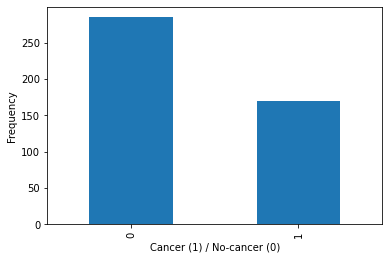

In [44]:
df['diagnosis'].value_counts().plot.bar()
plt.xlabel('Cancer (1) / No-cancer (0)')
plt.ylabel('Frequency')
plt.show()

Now we use the function SMOTE to make new samples:

In [45]:
# use SMOTE to balance the dataset.
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

We can see, figure below, our data is now equilibrated.

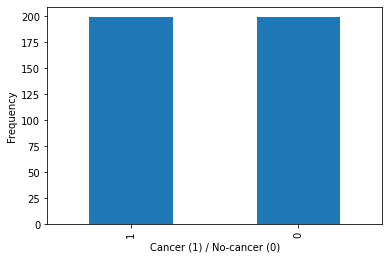

In [46]:
pd.Series(y_train_sm).value_counts().plot.bar()
plt.xlabel('Cancer (1) / No-cancer (0)')
plt.ylabel('Frequency')
plt.show()

===Decision Tree===
R^2 for train:  1.0
R^2 for test:  0.9197080291970803
Accuracy:  0.9197080291970803
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        86
           1       0.87      0.92      0.90        51

    accuracy                           0.92       137
   macro avg       0.91      0.92      0.92       137
weighted avg       0.92      0.92      0.92       137



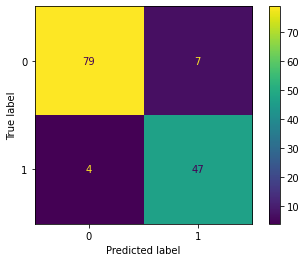

===KNearest Neighbours===
R^2 for train:  0.9673366834170855
R^2 for test:  0.948905109489051
Accuracy:  0.948905109489051
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        86
           1       0.92      0.94      0.93        51

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



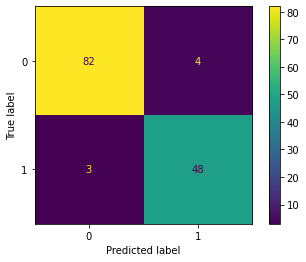

===SVMachine===
R^2 for train:  0.9798994974874372
R^2 for test:  0.9708029197080292
Accuracy:  0.9708029197080292
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        86
           1       1.00      0.92      0.96        51

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



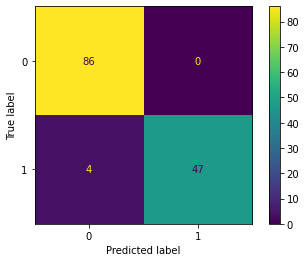

In [47]:
# Decision Tree Classifier
mSDTSM = DecisionTreeClassifier(random_state=42)
mSDTSM.fit(X_train_sm, y_train_sm)

print('===Decision Tree===')
print('R^2 for train: ', mSDTSM.score(X_train_sm, y_train_sm))
print('R^2 for test: ', mSDTSM.score(X_test, y_test))

# prediction:
ypSDTSM = mSDTSM.predict(X_test)

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSDTSM))
print(metrics.classification_report(y_test, ypSDTSM))
metrics.plot_confusion_matrix(mSDTSM, X_test, y_test)
plt.show()
# KNearest Neighbors
mSKNNSM = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
mSKNNSM.fit(X_train_sm, y_train_sm)

# prediction:
ypSKNNSM = mSKNNSM.predict(X_test)

print('===KNearest Neighbours===')
print('R^2 for train: ', mSKNNSM.score(X_train_sm, y_train_sm))
print('R^2 for test: ', mSKNNSM.score(X_test, y_test))

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSKNNSM))
print(metrics.classification_report(y_test, ypSKNNSM))
metrics.plot_confusion_matrix(mSKNNSM, X_test, y_test)
plt.show()

# Suport Vector Machine
#import time
#time0 = time.time()
mSSVCSM = svm.SVC(kernel='linear',random_state=42)
mSSVCSM.fit(X_train_sm,y_train_sm)
#time1 = time.time()

# prediction:
ypSSVCSM = mSSVC.predict(X_test)

print('===SVMachine===')
print('R^2 for train: ', mSSVCSM.score(X_train_sm, y_train_sm))
print('R^2 for test: ', mSSVCSM.score(X_test, y_test))

# accuracy, classification report, confusion_matrix
print('Accuracy: ',metrics.accuracy_score(y_test, ypSSVCSM))
print(metrics.classification_report(y_test, ypSSVCSM))
metrics.plot_confusion_matrix(mSSVCSM, X_test, y_test)
plt.show()

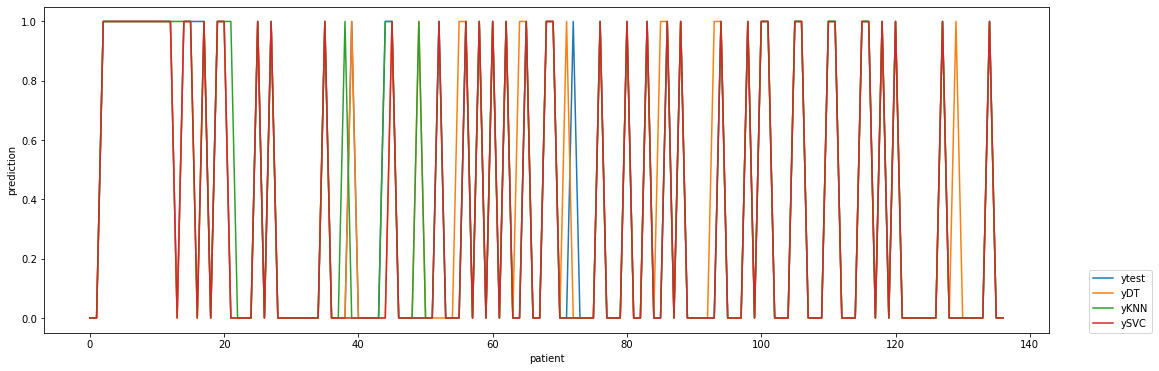

In [48]:
f, ax = plt.subplots(figsize = (18,6))
xc = np.array(list(range(0,X_test.shape[0])))
line0 = plt.plot(xc, y_test)
line1 = plt.plot(xc, ypSDTSM)
line2 = plt.plot(xc, ypSKNNSM)
line3 = plt.plot(xc, ypSSVCSM)
plt.xlabel('patient')
plt.ylabel('prediction')
plt.legend(['ytest', 'yDT', 'yKNN', 'ySVC'],loc=(1.04,0))
plt.show()

In the figure above we can see the red line (prediction of SVM) and green (prediction KNearest Neighbours) are the ones that follows more closley the blue line (test true results). The standarization of the data set provides more accurates results than using the raw data.

Table Summary of well-behaviour of the three methods used for the training:


$$\begin{array}{| c | c | c c c c || c | c | c | c | c |}
 &  \mbox{Accuracy} & \mbox{TP}(\%) & \mbox{FP} (\%) & \mbox{FN} (\%) & \mbox{TN} (\%)  & \mbox{Class}  & \mbox{Precision} & \mbox{Recall} & \mbox{F1-score} \\
\hline
\mbox{Decision Tree}  & 0.920 & 57.66 & 5.11 & 2.92 & 34.31 & 0 & 0.95 & 0.92 & 0.93 \\
 & &  &  &  &  & 1 & 0.87 & 0.92 & 0.90 \\ 
\hline
\mbox{KNeighbours}  & 0.949 & 59.85 & 2.92 & 2.19 & 35.04 & 0 & 0.96 & 0.95 & 0.96 \\
 & &  &  &  &  & 1 & 0.92 & 0.94 & 0.93 \\
\hline
\mbox{SVC}  & 0.971 & 62.77 & 0 & 2.92 & 33.58 & 0 & 34.31 & 1.00 & 0.98 \\
 & &  &  &  &  & 1 & 1.00 & 0.92 & 0.96 \\
\hline
\end{array}$$

The Accuracy and the confusion matrix for the algorithms Decision Tree and KNearest Neighbours had decreased quantitively, while the SVM algorithm continues to gives as good results as when it was the data only standarized. 

For algorithm testing and obtaining the final results we will use the data only standarized without balance, since there is not difference in the SVM algorithm. Although, we need to be careful in treating this result, since even though the algorithm is able to infer to detect none of the false positives, the number of the false negatives is high enough to suppose that the algorithm tested with another dataset might detect higher false positives.

# Algorithm testing:

For testing the algorithm against the dataset the problems asks us. We need to load the second dataset: test.cvs. It data set is identical to the dataset above but it misses the diagnose of the tumor, which the problem asks us to find.

In [49]:
df_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.0626,0.08216,0.2136,0.06710
1,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
2,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.1848,0.13350,0.3227,0.09326
3,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.15300,0.59370,0.6451,0.27560,0.3690,0.08815
4,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.0000,0.00000,0.2458,0.06592


In [50]:
df_test.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Now, let's "clean" the columns that we have found to be not necessary for determine the diagnose of the tumor.

In [51]:
# drop the same columns of train set:
dftest = df_test.drop(list0[1:],axis=1)
dftest

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.2142,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
1,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.3141,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
2,13.470,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.1588,...,14.83,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326
3,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.9948,...,33.13,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815
4,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.3163,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,10.490,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.3550,...,11.54,23.31,74.22,402.8,0.12190,0.14860,0.07987,0.03203,0.2826,0.07552
110,10.510,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.2868,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
111,11.890,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.2963,...,13.25,27.10,86.20,531.2,0.14050,0.30460,0.28060,0.11380,0.3397,0.08365
112,17.010,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.5858,...,19.80,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469


Make the dataset from pandas to an array:

In [52]:
X2 = np.array(dftest)
X2.shape

(114, 25)

### a) Raw data

In [53]:
# Decision Tree Classifier
# prediction:
ypDT2 = mDT.predict(X2)

# KNearest Neighbors
# prediction:
ypKNN2 = mKNN.predict(X2)

# Suport Vector Machine
# prediction:
ypSVC2 = mSVC.predict(X2)

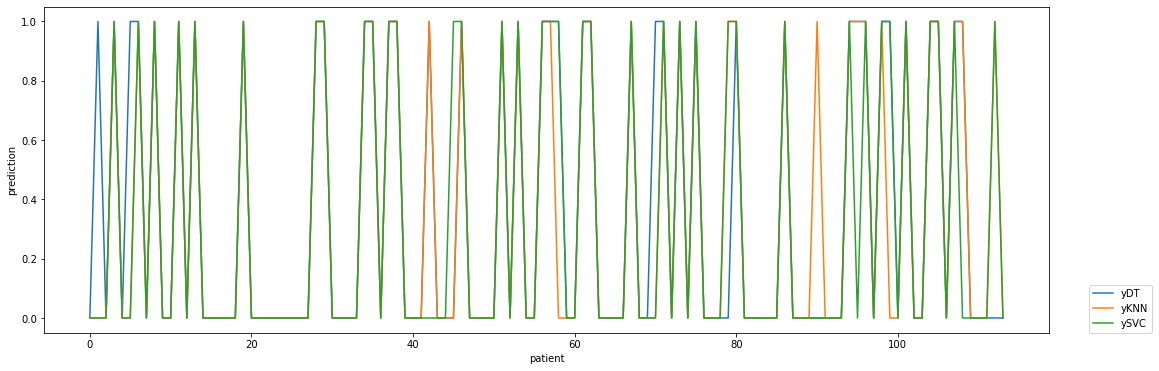

In [54]:
f, ax = plt.subplots(figsize = (18,6))
xc = np.array(list(range(0,X2.shape[0])))
line1 = plt.plot(xc, ypDT2)
line2 = plt.plot(xc, ypKNN2)
line3 = plt.plot(xc, ypSVC2)
plt.xlabel('patient')
plt.ylabel('prediction')
plt.legend(['yDT', 'yKNN', 'ySVC'],loc=(1.04,0))
plt.show()

In the figure, first of all we notice there is something wrong with the prediction of the Decision tree, thus we will not take this one into account. Also, that the KNN and SVM have very similar results.

### b) Standarized

In [55]:
# use robustscaler in X
scaler2 = RobustScaler()
X2_scaled = scaler2.fit_transform(X2)

In [56]:
# Decision Tree Classifier
# prediction:
ypSDT2 = mSDT.predict(X2_scaled)

# KNearest Neighbors
# prediction:
ypSKNN2 = mSKNN.predict(X2_scaled)

# Suport Vector Machine
# prediction:
ypSSVC2 = mSSVC.predict(X2_scaled)

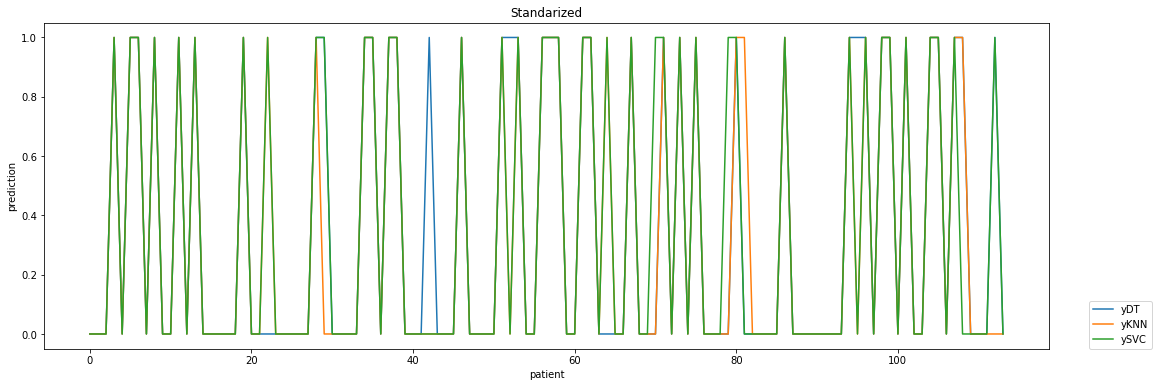

In [57]:
f, ax = plt.subplots(figsize = (18,6))
xc = np.array(list(range(0,X2.shape[0])))
line1 = plt.plot(xc, ypSDT2)
line2 = plt.plot(xc, ypSKNN2)
line3 = plt.plot(xc, ypSSVC2)
plt.xlabel('patient')
plt.ylabel('prediction')
plt.legend(['yDT', 'yKNN', 'ySVC'], loc=(1.04,0))
plt.title('Standarized')
plt.show()

In the figure above we can see that there is a bit of discrepancy between the results of decision tree and SVM if we remember in the training of the algorithm we have notice that these two had more discrepancy than the KNN algorithm, contrary of these results. We also to see how similar are the results obtained we have calculated the accuracy, values below, Decision Tree has higher accuracy followed by the SVM, which indicates more stablity and a finer result, and also, we noted that for Standarization and Balance (SMOTE) SVM had given a more accurate result.

In [58]:
print('Accuracy DT: ',metrics.accuracy_score(ypDT2, ypSDT2))
print('Accuracy KNN: ',metrics.accuracy_score(ypKNN2, ypSKNN2))
print('Accuracy SVC: ',metrics.accuracy_score(ypSVC2, ypSSVC2))

Accuracy DT:  0.9649122807017544
Accuracy KNN:  0.8947368421052632
Accuracy SVC:  0.956140350877193


### c) With SMOTE

In [59]:
# Decision Tree Classifier
# prediction:
ypSDT3 = mSDTSM.predict(X2_scaled)

# KNearest Neighbors
# prediction:
ypSKNN3 = mSKNNSM.predict(X2_scaled)

# Suport Vector Machine
# prediction:
ypSSVC3 = mSSVCSM.predict(X2_scaled)

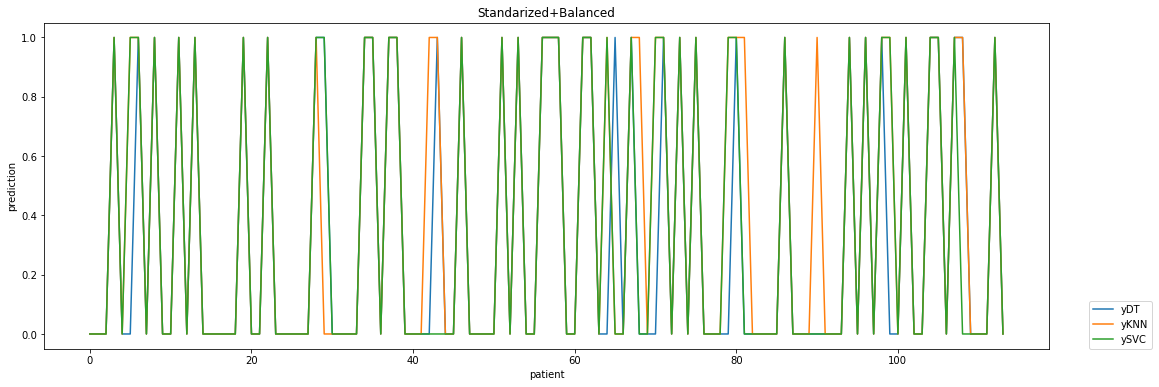

In [60]:
f, ax = plt.subplots(figsize = (18,6))
xc = np.array(list(range(0,X2.shape[0])))
line1 = plt.plot(xc, ypSDT3)
line2 = plt.plot(xc, ypSKNN3)
line3 = plt.plot(xc, ypSSVC3)
plt.xlabel('patient')
plt.ylabel('prediction')
plt.legend(['yDT', 'yKNN', 'ySVC'], loc=(1.04,0))
plt.title('Standarized+Balanced')
plt.show()

In the graph we can see that the values obtained are similar to the the computed with standarization alone. The Decision tree and the KNN algorithm differ a bit from the SVM algorithm, but this one it is expected to give the same predicted results as the training set, with a $0.97/%$ of accuracy. Thus it is the best algorithm to fit our data.

In [61]:
print('Accuracy DT: ',metrics.accuracy_score(ypSDT2, ypSDT3))
print('Accuracy KNN: ',metrics.accuracy_score(ypSKNN2, ypSKNN3))
print('Accuracy SVC: ',metrics.accuracy_score(ypSSVC2, ypSSVC3))

Accuracy DT:  0.9298245614035088
Accuracy KNN:  0.9385964912280702
Accuracy SVC:  1.0


As expected the values predicted by SVM with Standarization and SMOTE are the same, and accuracy for KNN had Decision tree has increased compared with the values before. 

## Summary & Output

In summary, to diagnose a set of patients with breast cancer or not, we have three different engineering methods for the data and we have trained three different algorithm to determine which one will be more precise in the prediction. We have found that the best prediction has come given by the SVM(C since is classificator) algorithm followed with Decision Tree, and that when we compare the predictions made, which we don't know the result, the more consisten along methods and data engineering it is the Support Vector Machine Classifer.

The file uploaded we will upload the prediction done by the SVC algorithm.

In [62]:
ypSSVC3

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0])

In [63]:
dfRes = pd.DataFrame({'Diagnosis' : ypSSVC3})
dfRes.head()

,Diagnosis
0,0
1,0
2,0
3,1
4,0


In [64]:
dfRes.to_csv('predictions.csv')